In [6]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm  # statsmodels    - Timeseries 

# statsmodels  

In [15]:
df =  pd.read_csv("electric.csv",index_col=0)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [19]:
# df.set_index('DATE')

In [18]:
df.index.min()

'1985-01-01'

In [17]:
df.index.max()

'2020-01-01'

In [21]:
df.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='object', name='DATE', length=421)

In [22]:
df.shape

(421, 1)

In [24]:
df.index = pd.to_datetime(df.index)  #### This is very imp - >>> Date or Datetime as index -- convert that into proper datetime


# pd.to_datetime

In [26]:
df.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=421, freq=None)

In [27]:
df.columns = ['Energy Production']
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [43]:
# Date component should be in the index of the dataframe
# The index should be in pandas date-time format

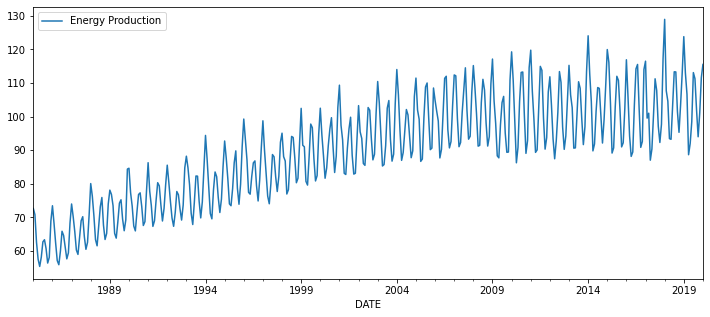

In [59]:
df.plot(figsize = (12,5))

In [71]:
# Decompostion of time series 


# Trend , Seasonality etc. 


## Will you have do it by writing your own function - NO 


# sm.tsa.seasonal_decompose
#df


# Residuals 


# Actual Predicted 

# Residuals or error - Acutal - Predicted

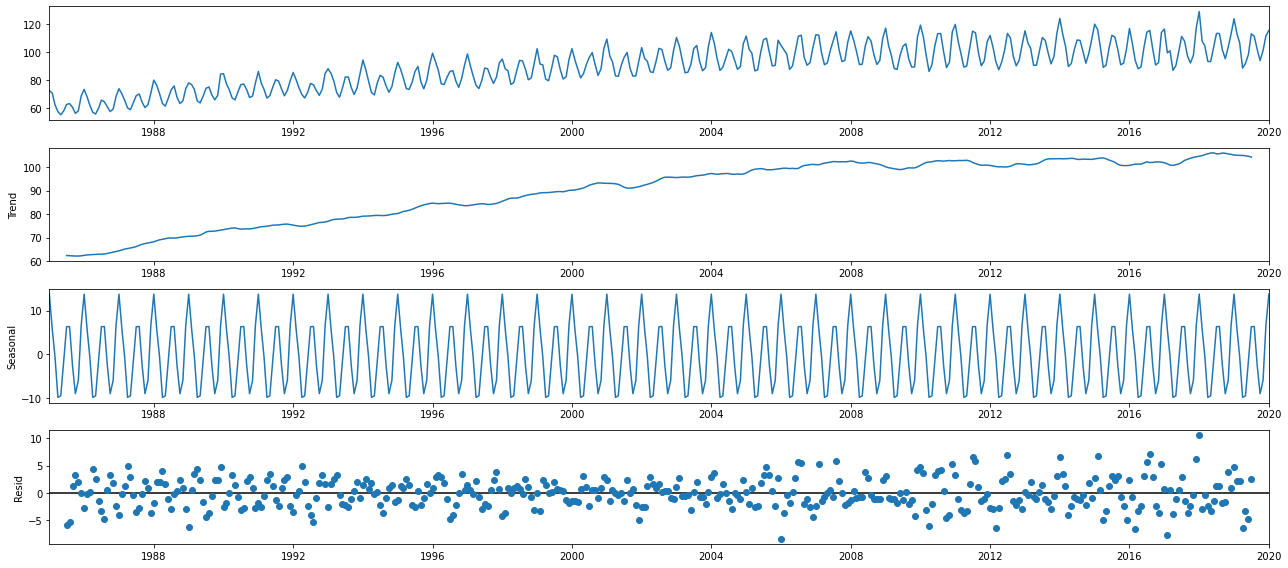

In [72]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

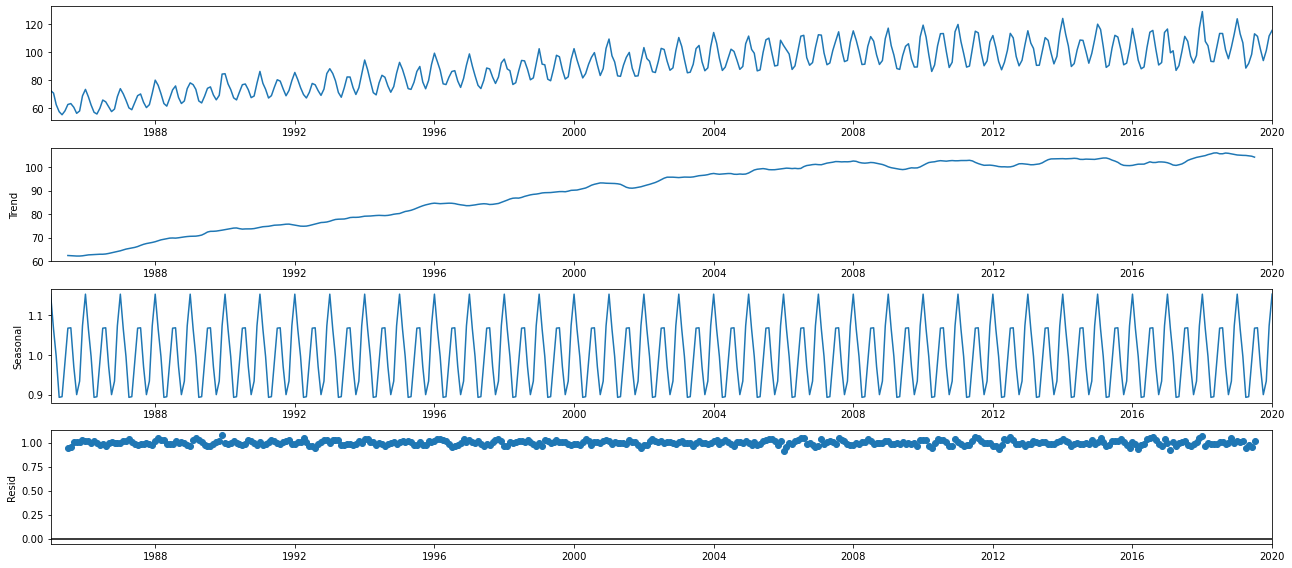

In [73]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
fig = decomposition.plot()

## Simple Moving Average Model

In [34]:
df.mean()

Energy Production    89.881611
dtype: float64

In [33]:
df.head(n=20)

# Moving Average Concept 


# Average / mean over moving data 

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
1985-06-01,58.2228
1985-07-01,62.7591
1985-08-01,63.3921
1985-09-01,60.7507


In [ ]:
## Window Funcntion in pandas 

In [38]:
# (70.8479 + 72.6803)/2

In [52]:
df_ma = df.copy()

# windows function 

# rolling 


df_ma['SMA_12'] = df_ma.rolling(window = 2).mean()


df_ma.head(20)

,Energy Production,SMA_12
DATE,,
1985-01-01,72.6803,NaN
1985-02-01,70.8479,71.76410
1985-03-01,62.6166,66.73225
1985-04-01,57.6106,60.11360
1985-05-01,55.4467,56.52865
1985-06-01,58.2228,56.83475
1985-07-01,62.7591,60.49095
1985-08-01,63.3921,63.07560
1985-09-01,60.7507,62.07140


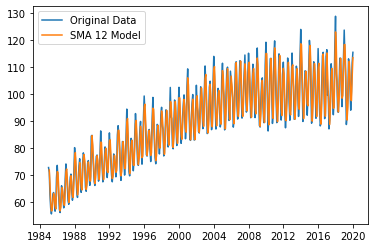

In [53]:
plt.plot(df_ma['Energy Production'], label = 'Original Data')
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [54]:
## Acutual - Predicted 


# mape - Mean absolute percentage error 


#Mean(AbS(( A - P) A )*100


# error - Actual - Predcited 

# Mean Absolute % error 

# 100 -- 110  - 10/100  - 0.1 
# 200 -- 220   - 20 /200  - 0.1
# 300 -- 330  - 30 / 300  - 0.1 

# 0.1 + 0.1 + 0.1 / 3 





def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100



In [57]:
mape(df_ma['Energy Production'], df_ma['SMA_12'])

3.696693337289074

## Stationarity Check using ADF TEST

In [58]:
# Stationary 


## Time Serie - Moving Average Model ( There is no assumptpn , Whats the data )


# There are few Modelling Techniques which says that your TImeseries should be Stationary 



# STATIONARY NATURE OF TS 

# 1. Mean should be Constant ( Mean of TS should not change WRT to time)
# 2. Variance Should be Constant ( Variance should not change wrt to time)
# 3. Covariance also need to be constant 


# If my TS is NOn STATIONARY , Can i Model TS model or not ?





In [ ]:
# NULL HYPOTHESIS - Time Series is not stationary

# Alternate Hypthesis  - Time Series is  stationary


# p value > 0.05 --- >> yu fail to reject null hypeothesis 

In [61]:
df

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467
...,...
2019-09-01,102.0039
2019-10-01,94.0000
2019-11-01,101.0766


In [63]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0873


- Null: Time Series is not stationary
- Alternate: Time Series is Stationary

Faile to reject Null. Conclude that my time series is not stationary

In [64]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [ ]:
# Timeseries is NON Stanionary 


#  I convert this to stantionary --- >>>>>> detrending , transformations maths , etc.

In [65]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [33]:
62.6166 - 70.8479 


-8.231299999999997

In [ ]:
## 

# T1 - X1 NA 
# T2 - X2  X2-X1
# T3 - X3 X3-X2
# T4 - X4 X4-X3

# One order differencing 


# X2- X1
# X3-X2

In [67]:
df.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [68]:
70.8479 - 72.6803

-1.832400000000007

In [69]:
# Let's a one order differencing


df_1 =     df.diff()

df_1.head()

# df  - df_1 by doing one order difference - in hope that this will make my TS stationary 

,Energy Production
DATE,
1985-01-01,NaN
1985-02-01,-1.8324
1985-03-01,-8.2313
1985-04-01,-5.0060
1985-05-01,-2.1639


In [70]:
df_1.dropna(inplace=True)

In [76]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df_1)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0000


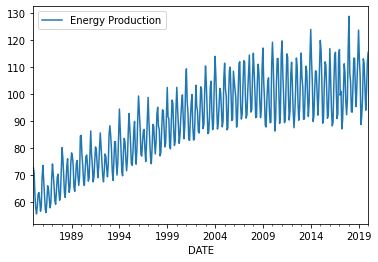

In [77]:
df.plot()

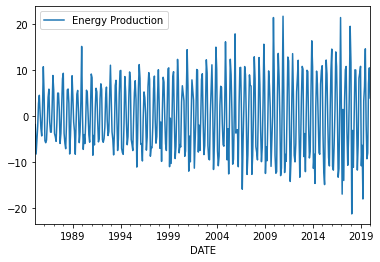

In [81]:
df_1.plot()

In [79]:


df_2 =     df_1.diff()

df_2.head()

,Energy Production
DATE,
1985-02-01,NaN
1985-03-01,-6.3989
1985-04-01,3.2253
1985-05-01,2.8421
1985-06-01,4.9400


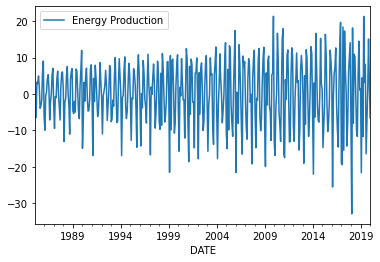

In [80]:
df_2.plot()